In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#each point plots length, if the animal has a blowhole(1 or 0), tooth size, and its identity vector
#[0,0,0] is a fish, [0,0,1] is a dolphin, and [0,1,0] is a shark
data = [[1   , 0       , 0.01],
	   [2    , 0       , 0.05],
	   [4    , 0       , 0.09],
	   [20   , 1       , 0.2],
	   [24   , 1       , 0.4],
	   [28   , 1       , 0.8],
	   [10   , 0       , 1],
	   [15   , 0       , 5],
	   [19   , 0       , 7]]

target=       [[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0],
               [0, 0, 1],
               [0, 0, 1],
               [0, 0, 1],
               [0, 1, 0],
               [0, 1, 0],
               [0, 1, 0],]

fish = [0,0,0]
dolphin = [0,0,1]
shark = [0,1,0]

In [4]:
#Sigmoid Activation Function
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_d(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [5]:
# Weights and biases
layer1weights = np.random.randn(3,4)
layer2weights = np.random.randn(4,3)
b1 = np.random.randn(1,4)
b2 = np.random.randn(1,3)

In [8]:
learning_rate = .2
costs=[]

for i in range(50000):
    # Random Points for training
    ri = np.random.randint(len(data))
    random_point = data[ri]
    target_point = target[ri]
    
    # Feed Forward
    z1 = np.dot(random_point, layer1weights) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, layer2weights) + b2
    prediction = sigmoid(z2)
    
    # Training
    cost = (np.square(prediction[0][0] - target_point[0]) + np.square(prediction[0][1] - target_point[1]))/2
    costs.append(cost)
    
    # For layer output layer weights
    dcost_dpred = 2 * (prediction[0] - target_point)
    dpred_dz2 = sigmoid_d(z2)
    dz2_dlayer2weights= a1.T
    delta_layer2weights = np.dot(dz2_dlayer2weights, np.multiply(dcost_dpred, dpred_dz2))
    
    # For hidden layer weights
    dz2_da1 = layer2weights.T
    da1_dz1 = sigmoid_d(z1)
    dz1_dw1 = np.matrix(random_point).T
    delta_layer1weights = np.dot(dz1_dw1, np.multiply(np.dot(np.multiply(dcost_dpred, dpred_dz2), dz2_da1), da1_dz1))
    
    # For adjusting bias matrix b2:
    delta_b2 = np.multiply(dcost_dpred, dpred_dz2)
    
    # For adjusting bias matrix b1:
    delta_b1 = np.multiply(np.dot(np.multiply(dcost_dpred, dpred_dz2), dz2_da1), da1_dz1)
    
    # Weight Adjustments:
    layer2weights -= np.multiply(learning_rate, delta_layer2weights)
    layer1weights -= np.multiply(learning_rate, delta_layer1weights)
    
    # Bias Adjustments:
    b2 -= np.multiply(learning_rate, delta_b2)
    b1 -= np.multiply(learning_rate, delta_b1)
    
    # Used if every result needs to be printed.
    
    #rounded_prediction = np.around(prediction)
    #if((np.array(target_point) == fish).all()):
    #    print("Target: Fish")
    #elif((np.array(target_point) == dolphin).all()):
    #    print("Target: Dolphin")
    #elif((np.array(target_point) == shark).all()):
    #    print("Target: Shark")
    #if((rounded_prediction[0] == fish).all()):
    #    print("Prediction: Fish")
    #elif((rounded_prediction[0] == dolphin).all()):
    #    print("Prediction: Dolphin")
    #elif((rounded_prediction[0] == shark).all()):
    #    print("Prediction: Shark")
    #else:
    #    print("Prediction: Not sure")
    

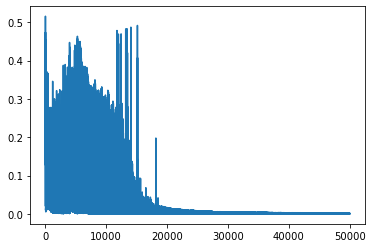

In [9]:
plt.plot(costs)